In [1]:
import pandas as pd
import numpy as np
data_file=r"data/SMSSpamCollection.txt"

In [2]:
sd=pd.read_csv(data_file,delimiter='\t',header=None,names=['target','message'])

In [3]:
sd.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from sklearn.model_selection import train_test_split

In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords # stopwords are the words which we want to remove from text
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [6]:
def split_into_lemmas(message):
    message=message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [7]:
sd_train,sd_test=train_test_split(sd,test_size=0.2,random_state=2)

In [8]:
sd_train.head()

,target,message
3890,ham,Unlimited texts. Limited minutes.
5553,ham,Hahaha..use your brain dear
4366,ham,Ujhhhhhhh computer shipped out with address to...
3968,spam,YOU HAVE WON! As a valued Vodafone customer ou...
3771,ham,Love it! The girls at the office may wonder wh...


In [9]:
sd_test.head(10)

,target,message
5086,ham,Omg if its not one thing its another. My cat h...
2120,ham,I hope you know I'm still mad at you.
2318,ham,Waqt se pehle or naseeb se zyada kisi ko kuch ...
2917,ham,What time should I tell my friend to be around?
1352,ham,Yo theres no class tmrw right?
1457,ham,U sleeping now.. Or you going to take? Haha.. ...
1908,ham,ELLO BABE U OK?
411,ham,Come by our room at some point so we can iron ...
385,spam,Double mins and txts 4 6months FREE Bluetooth ...
5463,ham,U GOIN OUT 2NITE?


In [10]:
tfidf= TfidfVectorizer(analyzer=split_into_lemmas,min_df=20,max_df=3000)

In [11]:
tfidf.fit(sd_train['message'])

TfidfVectorizer(analyzer=<function split_into_lemmas at 0x00000201C13D7B88>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=3000, max_features=None,
                min_df=20, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [12]:
train_data=tfidf.transform(sd_train['message'])

In [13]:
test_data=tfidf.transform(sd_test['message'])

In [14]:
import matplotlib.pylab as plt
import scipy.sparse as sparse

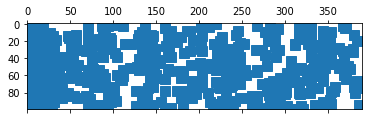

In [15]:
A = train_data
# visualize the sparse matrix with Spy
plt.spy(A[0:100])

In [16]:
message = 'my red-blue socks are the pretty prettier prettiest socks in the world and the nation needs more socks like these. , , , , , .. /'
message=message.lower()
message

'my red-blue socks are the pretty prettier prettiest socks in the world and the nation needs more socks like these. , , , , , .. /'

In [17]:
words = word_tokenize(message)
words

['my',
 'red-blue',
 'socks',
 'are',
 'the',
 'pretty',
 'prettier',
 'prettiest',
 'socks',
 'in',
 'the',
 'world',
 'and',
 'the',
 'nation',
 'needs',
 'more',
 'socks',
 'like',
 'these',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 '..',
 '/']

In [18]:
words_sans_stop=[]
for word in words :
    if word in stop:
        print(word, ':          skipped')
        continue
    words_sans_stop.append(word)
    print(word,     ':          appended')

my :          skipped
red-blue :          appended
socks :          appended
are :          skipped
the :          skipped
pretty :          appended
prettier :          appended
prettiest :          appended
socks :          appended
in :          skipped
the :          skipped
world :          appended
and :          skipped
the :          skipped
nation :          appended
needs :          appended
more :          skipped
socks :          appended
like :          appended
these :          skipped
. :          appended
, :          appended
, :          appended
, :          appended
, :          appended
, :          appended
.. :          appended
/ :          appended


In [19]:
lemmated=[lemma.lemmatize(word) for word in words_sans_stop]
lemmated

['red-blue',
 'sock',
 'pretty',
 'prettier',
 'prettiest',
 'sock',
 'world',
 'nation',
 'need',
 'sock',
 'like',
 '.',
 ',',
 ',',
 ',',
 ',',
 ',',
 '..',
 '/']